In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import itertools
from sklearn import preprocessing
import seaborn as sns
import plotly.express as px
from matplotlib.widgets import CheckButtons
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/DatasetEDA/superstore_dataset2011-2015.csv',encoding='ISO-8859-1')
df.shape

Row ID  Postal Code    Sales  Quantity  Discount    Profit  \
0       42433          NaN  408.300         2       0.0  106.1400   
1       22253          NaN  120.366         3       0.1   36.0360   
2       48883          NaN   66.120         4       0.0   29.6400   
3       11731          NaN   44.865         3       0.5  -26.0550   
4       22255          NaN  113.670         5       0.1   37.7700   
...       ...          ...      ...       ...       ...       ...   
51285   32593      94533.0   13.904         2       0.2    4.5188   
51286   47594          NaN    3.990         1       0.0    0.4200   
51287    8857          NaN   26.400         3       0.0   12.3600   
51288    6852          NaN    7.120         1       0.0    0.5600   
51289   36388      80538.0    3.024         3       0.2   -0.6048   

       Shipping Cost  
0              35.46  
1               9.72  
2               8.17  
3               4.82  
4               4.70  
...              ...  
51285           0.89  
51286           0.49  
51287           0.35  
51288           0.20  
51289           0.17  

[51290 rows x 7 columns]

# Variable Description
- **`Order ID:`** A unique identifier for each sales order.
- **`Order Date:`** The date when the order was placed.
- **`Ship Date:`** The date when the order was shipped.
- **`Ship Mode`**: The shipping mode for the order (e.g., Standard Class, Second Class, etc.).
- **`Customer ID:`** A unique identifier for each customer.
- **`Customer Name:`** The name of the customer.
- **`Segment:`** The customer segment (e.g., Consumer, Corporate, Home Office).
- **`Country:`** The country where the customer is located.
- **`City:`** The city where the customer is located.
- **`State:`** The state where the customer is located.
- **`Postal Code:`** The postal code of the customer's location.
- **`Region:`** The region where the customer is located.
- **`Product ID:`** A unique identifier for each product.
- **`Category:`** The category to which the product belongs (e.g., Furniture, Office Supplies, Technology).
- **`Sub-Category:`** The sub-category to which the product belongs.
- **`Product Name:`** The name of the product.
- **`Sales:`** The total sales amount for the order.
- **`Quantity:`** The quantity of products sold in the order.
- **`Discount:`** The discount applied to the order.
- **`Profit:`** The profit generated from the order.

In [14]:
#Data Cleaning
missing_values = df.isnull().sum()
missing_values
missing_values_percentage = (missing_values/df.shape[0])*100
missing_values_percentage
df = df.drop(columns='Postal Code',axis=1)
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [ ]:
top_selling_products = df.groupby(['Product Name','Category','Sub-Category']).agg({"Sales":"sum"}).sort_values('Sales',ascending=False)
top_selling_products

Sales
Product Name                                       Category        Sub-Category            
Apple Smart Phone, Full Size                       Technology      Phones        86935.7786
Cisco Smart Phone, Full Size                       Technology      Phones        76441.5306
Motorola Smart Phone, Full Size                    Technology      Phones        73156.3030
Nokia Smart Phone, Full Size                       Technology      Phones        71904.5555
Canon imageCLASS 2200 Advanced Copier              Technology      Copiers       61599.8240
...                                                                                     ...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set Office Supplies Art               7.7000
Grip Seal Envelopes                                Office Supplies Envelopes         7.0720
Xerox 20                                           Office Supplies Paper             6.4800
Avery 5                                            Office Supplies Labels            5.7600
Eureka Disposable Bags for Sanitaire Vibra Groo... Office Supplies Appliances        1.6240

[3797 rows x 1 columns]

<ipython-input-10-443ebb49d5d3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

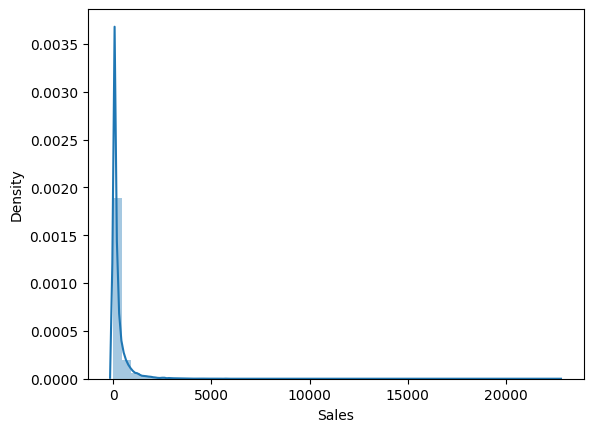

In [ ]:
sales_sample = df['Sales'].sample(n=1000,random_state=42)
sns.distplot(df['Sales'])

In [ ]:
country_wise_highest_sales = df.groupby('Country')['Sales'].sum()
country_wise_highest_sales.sort_values(ascending=False)

Country
United States        2.297201e+06
Australia            9.252359e+05
France               8.589311e+05
China                7.005620e+05
Germany              6.288400e+05
                         ...     
Tajikistan           2.427840e+02
Macedonia            2.096400e+02
Eritrea              1.877400e+02
Armenia              1.567500e+02
Equatorial Guinea    1.505100e+02
Name: Sales, Length: 147, dtype: float64

In [ ]:
customer_segment_contribution_sales_profitability = df.groupby(['Segment']).agg({'Sales': 'sum', 'Profit': 'sum'})
print(customer_segment_contribution_sales_profitability)

                    Sales        Profit
Segment                                
Consumer     6.507949e+06  749239.78206
Corporate    3.824698e+06  441208.32866
Home Office  2.309855e+06  277009.18056


In [ ]:
avg_sales = df['Sales'].mean()
below_avg_sales = df.loc[df['Sales']<avg_sales].groupby(['Product Name','Category'])['Sales'].mean().sort_values(ascending=False)
below_avg_sales

Product Name                                                                Category       
Hoover Microwave, Black                                                     Office Supplies    246.4560
Nortel Meridian M3904 Professional Digital phone                            Technology         246.3840
O'Sullivan Manor Hill 2-Door Library in Brianna Oak                         Furniture          246.1328
Novimex Executive Leather Armchair, Red                                     Furniture          245.4400
Logitech Router, Erganomic                                                  Technology         245.1300
                                                                                                 ...   
Acco Economy Flexible Poly Round Ring Binder                                Office Supplies      2.8710
Computer Printout Index Tabs                                                Office Supplies      2.7720
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum  

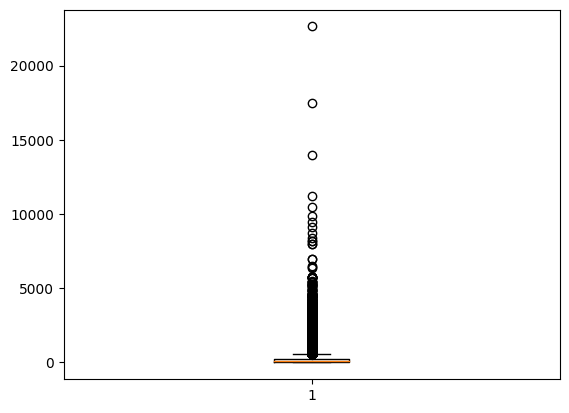

In [6]:
q1,q3 = np.percentile(df['Sales'],[25,75])
iqr = q3-q1
lowerinference =  q3 - 1.5*iqr
upperinference = q3 +1.5*iqr
# print(lowerinference,upperinference)
outliers = df.loc[df['Sales']>581]
plt.boxplot(df['Sales'])
plt.show()

**Correlation Analysis**

In [7]:
#Correlation Analysis
correlation = df.iloc[:,17:21].corr()
correlation

Sales  Quantity  Discount    Profit
Sales     1.000000  0.313577 -0.086722  0.484918
Quantity  0.313577  1.000000 -0.019875  0.104365
Discount -0.086722 -0.019875  1.000000 -0.316490
Profit    0.484918  0.104365 -0.316490  1.000000

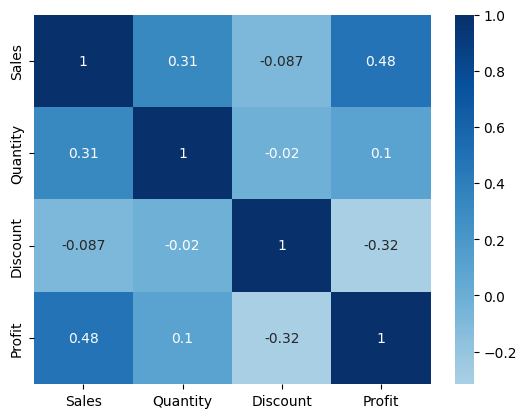

In [8]:
sns.heatmap(correlation,annot=True,cmap='Blues',center=0);

In [ ]:
sales_mean = np.mean(df['Sales'])
sales_std = statistics.stdev(df['Sales'])
cv = (sales_mean/sales_std)*100
print(cv)

50.55539239504224


In [ ]:
max_sales = df.groupby('Country')['Sales'].max().sort_values(ascending=False)
print(max_sales)

Country
United States        22638.48
Italy                 7958.58
Japan                 6998.64
Spain                 6517.08
New Zealand           6439.80
                       ...   
Swaziland              204.36
Eritrea                169.92
Equatorial Guinea      124.29
Macedonia               98.88
Armenia                 94.20
Name: Sales, Length: 147, dtype: float64


**Order Delivery Speed Calcultion**

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
def calculate_delivery_speed(group):
    delivery_time = (df['Ship Date'] - df['Order Date']).mean()
    return delivery_time
delivery_speed = df.groupby('Ship Mode').agg(calculate_delivery_speed)
print(delivery_speed.iloc[:])

<ipython-input-19-354dcf19e5ca>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-19-354dcf19e5ca>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


                                  Row ID                  Order ID  \
Ship Mode                                                            
First Class    5 days 01:53:49.120686293 5 days 01:53:49.120686293   
Same Day       5 days 01:53:49.120686293 5 days 01:53:49.120686293   
Second Class   5 days 01:53:49.120686293 5 days 01:53:49.120686293   
Standard Class 5 days 01:53:49.120686293 5 days 01:53:49.120686293   

                              Order Date                 Ship Date  \
Ship Mode                                                            
First Class    5 days 01:53:49.120686293 5 days 01:53:49.120686293   
Same Day       5 days 01:53:49.120686293 5 days 01:53:49.120686293   
Second Class   5 days 01:53:49.120686293 5 days 01:53:49.120686293   
Standard Class 5 days 01:53:49.120686293 5 days 01:53:49.120686293   

                             Customer ID             Customer Name  \
Ship Mode                                                            
First Class    5 d

In [ ]:
country = df.loc[df.groupby('Country')['Sales'].idxmax(),['State','Country','Sales']]
print(country[0:10])

                 State      Country     Sales
30520            Kabul  Afghanistan  4626.150
700            Elbasan      Albania  1619.100
43686           Guelma      Algeria  1908.720
2112          Benguela       Angola  2478.600
36943     Buenos Aires    Argentina  2300.616
23392             Lori      Armenia    94.200
4049   South Australia    Australia  5759.964
19884        Carinthia      Austria  3221.400
37092             Baki   Azerbaijan  2058.000
32948         Muharraq      Bahrain   625.020


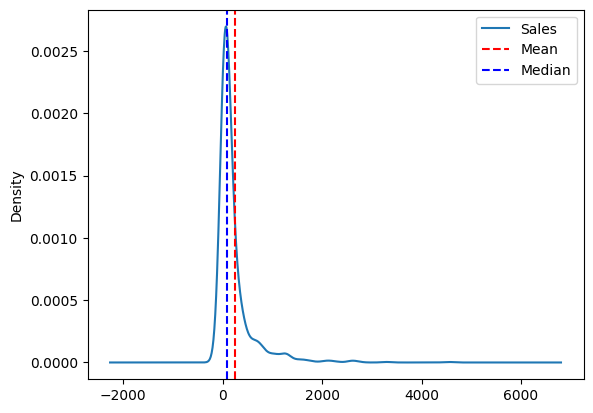

In [16]:
sales_sample2 = df['Sales'].sample(n=1000,random_state=42)
sales_sample2.plot(kind='density')
plt.axvline(x=df['Sales'].mean(),color='red',linestyle='--',label='Mean')
plt.axvline(x=df['Sales'].median(),color='blue',linestyle='--',label='Median')
plt.legend()
plt.show()

In [17]:
Categorical = df.dtypes[df.dtypes=='object'].index
df[Categorical]

Order ID  Order Date Ship Date       Ship Mode Customer ID  \
0         AG-2011-2040    1/1/2011  6/1/2011  Standard Class    TB-11280   
1        IN-2011-47883    1/1/2011  8/1/2011  Standard Class    JH-15985   
2         HU-2011-1220    1/1/2011  5/1/2011    Second Class      AT-735   
3      IT-2011-3647632    1/1/2011  5/1/2011    Second Class    EM-14140   
4        IN-2011-47883    1/1/2011  8/1/2011  Standard Class    JH-15985   
...                ...         ...       ...             ...         ...   
51285   CA-2014-115427  31-12-2014  4/1/2015  Standard Class    EB-13975   
51286     MO-2014-2560  31-12-2014  5/1/2015  Standard Class     LP-7095   
51287   MX-2014-110527  31-12-2014  2/1/2015    Second Class    CM-12190   
51288   MX-2014-114783  31-12-2014  6/1/2015  Standard Class    TD-20995   
51289   CA-2014-156720  31-12-2014  4/1/2015  Standard Class    JM-15580   

          Customer Name      Segment         City             State  \
0       Toby Braunhardt     Consumer  Constantine       Constantine   
1           Joseph Holt     Consumer  Wagga Wagga   New South Wales   
2         Annie Thurman     Consumer     Budapest          Budapest   
3          Eugene Moren  Home Office    Stockholm         Stockholm   
4           Joseph Holt     Consumer  Wagga Wagga   New South Wales   
...                 ...          ...          ...               ...   
51285        Erica Bern    Corporate    Fairfield        California   
51286         Liz Preis     Consumer       Agadir  Souss-Massa-Draâ   
51287  Charlotte Melton     Consumer      Managua           Managua   
51288     Tamara Dahlen     Consumer       Juárez         Chihuahua   
51289     Jill Matthias     Consumer     Loveland          Colorado   

             Country  Market   Region        Product ID         Category  \
0            Algeria  Africa   Africa  OFF-TEN-10000025  Office Supplies   
1          Australia    APAC  Oceania   OFF-SU-10000618  Office Supplies   
2            Hungary    EMEA     EMEA  OFF-TEN-10001585  Office Supplies   
3             Sweden      EU    North   OFF-PA-10001492  Office Supplies   
4          Australia    APAC  Oceania   FUR-FU-10003447        Furniture   
...              ...     ...      ...               ...              ...   
51285  United States      US     West   OFF-BI-10002103  Office Supplies   
51286        Morocco  Africa   Africa  OFF-WIL-10001069  Office Supplies   
51287      Nicaragua   LATAM  Central   OFF-LA-10004182  Office Supplies   
51288         Mexico   LATAM    North   OFF-LA-10000413  Office Supplies   
51289  United States      US     West   OFF-FA-10003472  Office Supplies   

      Sub-Category                                     Product Name  \
0          Storage                              Tenex Lockers, Blue   
1         Supplies                         Acme Trimmer, High Speed   
2          Storage                          Tenex Box, Single Width   
3            Paper                      Enermax Note Cards, Premium   
4      Furnishings                       Eldon Light Bulb, Duo Pack   
...            ...                                              ...   
51285      Binders  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   
51286      Binders          Wilson Jones Hole Reinforcements, Clear   
51287       Labels           Hon Color Coded Labels, 5000 Label Set   
51288       Labels           Hon Legal Exhibit Labels, Alphabetical   
51289    Fasteners                              Bagged Rubber Bands   

      Order Priority  
0             Medium  
1             Medium  
2               High  
3               High  
4             Medium  
...              ...  
51285         Medium  
51286         Medium  
51287         Medium  
51288         Medium  
51289         Medium  

[51290 rows x 17 columns]

In [ ]:
country_wise_sales = df.groupby('Country')['Sales'].sum()

In [ ]:
df['Customer ID'].describe()

count        51290
unique        1590
top       PO-18850
freq            97
Name: Customer ID, dtype: object

In [ ]:
customer_group  = df['Customer ID'].astype(str)
customer_grouping = np.array([cid[:2] for cid in customer_group])
new_customer_group = pd.Categorical(customer_grouping)
new_customer_group.describe()

counts     freqs
categories                  
AA             244  0.004757
AB             481  0.009378
AC             226  0.004406
AD              55  0.001072
AF             174  0.003392
...            ...       ...
XP              61  0.001189
YC              56  0.001092
YS              62  0.001209
ZC              85  0.001657
ZD              54  0.001053

[292 rows x 2 columns]

In [ ]:
new_customer_group.value_counts().sort_values(ascending=False)

SC    1032
TB     705
CS     680
CC     654
TS     616
      ... 
KS      43
NL      43
PH      41
VS      40
EK      36
Length: 292, dtype: int64

In [ ]:
maximum_purchase_by_customer_id = df.loc[df['Customer ID'].str.contains('SC')]
maximum_purchase_by_customer_id['Customer Name'].value_counts().sort_values(ascending=False)

Sample Company A      90
Shahid Collister      85
Stewart Carmichael    83
Sean Christensen      76
Steve Chapman         74
Scott Cohen           74
Steven Cartwright     73
Steve Carroll         71
Sam Craven            69
Sanjit Chand          69
Scot Coram            64
Sonia Cooley          57
Shaun Chance          56
Sung Chung            46
Stuart Calhoun        45
Name: Customer Name, dtype: int64

In [ ]:
avg_profit = df['Profit'].mean()
customer_negative_profit_contribution = df.loc[df['Profit']<=0]
customer_negative_profit_contribution.sort_values('Profit',ascending=True)

Row ID         Order ID Order Date  Ship Date       Ship Mode  \
43453   39069   CA-2013-108196 2013-11-26 2013-03-12  Standard Class   
43136   48663     TU-2013-9400 2013-09-26 2013-09-26        Same Day   
15886   31980   US-2014-168116 2014-05-11 2014-05-11        Same Day   
42767   41071   CA-2011-169019 2011-07-26 2011-07-30  Standard Class   
28813   34308   CA-2014-134845 2014-04-18 2014-04-24  Standard Class   
...       ...              ...        ...        ...             ...   
47752   25299    IN-2014-53707 2014-05-29 2014-02-06    Second Class   
20018    8663   MX-2014-157042 2014-12-12 2014-12-14    Second Class   
37401    4808   MX-2012-169600 2012-05-23 2012-05-25     First Class   
21078   12602  ES-2012-3131770 2012-09-13 2012-09-17  Standard Class   
46892    4085   MX-2014-118360 2014-10-28 2014-10-31     First Class   

      Customer ID   Customer Name      Segment         City           State  \
43453    CS-12505   Cindy Stewart     Consumer    Lancaster            Ohio   
43136     DM-3345   Denise Monton    Corporate      Bornova           Izmir   
15886    GT-14635  Grant Thornton    Corporate   Burlington  North Carolina   
42767    LF-17185     Luke Foster     Consumer  San Antonio           Texas   
28813    SR-20425  Sharelle Roach  Home Office   Louisville        Colorado   
...           ...             ...          ...          ...             ...   
47752    DJ-13630     Doug Jacobs     Consumer       Guntur  Andhra Pradesh   
20018    LP-17095       Liz Preis     Consumer   Bridgetown   Saint Michael   
37401    MP-17470     Mark Packer  Home Office    Soyapango    San Salvador   
21078    AH-10075       Adam Hart    Corporate        Namur           Namur   
46892    DL-13495    Dionis Lloyd    Corporate        Apopa    San Salvador   

       ...        Product ID         Category Sub-Category  \
43453  ...   TEC-MA-10000418       Technology     Machines   
43136  ...  TEC-MOT-10003050       Technology       Phones   
15886  ...   TEC-MA-10004125       Technology     Machines   
42767  ...   OFF-BI-10004995  Office Supplies      Binders   
28813  ...   TEC-MA-10000822       Technology     Machines   
...    ...               ...              ...          ...   
47752  ...   OFF-LA-10003678  Office Supplies       Labels   
20018  ...   FUR-FU-10000110        Furniture  Furnishings   
37401  ...   OFF-BI-10001304  Office Supplies      Binders   
21078  ...   FUR-CH-10003249        Furniture       Chairs   
46892  ...   OFF-FA-10001727  Office Supplies    Fasteners   

                                    Product Name     Sales Quantity Discount  \
43453  Cubify CubeX 3D Printer Double Head Print  4499.985        5      0.7   
43136             Motorola Smart Phone, Cordless  3085.344       12      0.6   
15886  Cubify CubeX 3D Printer Triple Head Print  7999.980        4      0.5   
42767  GBC DocuBind P400 Electric Binding System  2177.584        8      0.8   
28813  Lexmark MX611dhe Monochrome Laser Printer  2549.985        5      0.7   
...                                          ...       ...      ...      ...   
47752           Hon Round Labels, 5000 Label Set    35.250        5      0.0   
20018                 Deflect-O Door Stop, Black    58.600        2      0.0   
37401            Cardinal 3-Hole Punch, Recycled    58.320        3      0.0   
21078     Office Star Steel Folding Chair, Black   446.400        5      0.0   
46892       Advantus Thumb Tacks, Assorted Sizes    36.800        5      0.0   

          Profit  Shipping Cost  Order Priority  
43453 -6599.9780         451.63             Low  
43136 -4088.3760          51.89        Critical  
15886 -3839.9904         674.82            High  
42767 -3701.8928         172.07          Medium  
28813 -3399.9800         120.31          Medium  
...          ...            ...             ...  
47752     0.0000           1.58          Medium  
20018     0.0000           8.12            High  
37401     0.0000          10.99      

In [ ]:
customer_negative_profit_contribution['Order Priority'].describe()

count      13212
unique         4
top       Medium
freq        7584
Name: Order Priority, dtype: object

In [ ]:
avg_profit  = df['Profit'].mean()
customer_positive_profit_contribution = df.loc[df['Profit']>avg_profit]
customer_positive_profit_contribution.sort_values('Profit',ascending=False)

Row ID         Order ID Order Date  Ship Date       Ship Mode  \
8898    38123   CA-2013-118689 2013-03-10 2013-10-10  Standard Class   
38848   39450   CA-2014-140151 2014-03-24 2014-03-26     First Class   
29946   35487   CA-2014-166709 2014-11-18 2014-11-23  Standard Class   
30124   40336   CA-2013-117121 2013-12-18 2013-12-22  Standard Class   
37929   35395   CA-2011-116904 2011-09-23 2011-09-28  Standard Class   
...       ...              ...        ...        ...             ...   
3926    41812     ZA-2012-5660 2012-02-03 2012-07-03  Standard Class   
8198    42274     EG-2013-6440 2013-02-01 2013-09-01  Standard Class   
749     14006  ES-2011-2132896 2011-03-05 2011-07-05    Second Class   
17829   31964   CA-2014-132682 2014-09-06 2014-11-06    Second Class   
8597    34370   CA-2013-125206 2013-03-01 2013-05-01     First Class   

      Customer ID       Customer Name    Segment         City  \
8898     TC-20980        Tamara Chand  Corporate    Lafayette   
38848    RB-19360        Raymond Buch   Consumer      Seattle   
29946    HL-15040        Hunter Lopez   Consumer       Newark   
30124    AB-10105       Adrian Barton   Consumer      Detroit   
37929    SC-20095        Sanjit Chand   Consumer  Minneapolis   
...           ...                 ...        ...          ...   
3926      MG-8205     Mitch Gastineau  Corporate        Ndola   
8198      KC-6540     Kelly Collister   Consumer     Hurghada   
749      MM-18280  Muhammed MacIntyre  Corporate       Bremen   
17829    TH-21235       Tiffany House  Corporate       Dallas   
8597     LR-16915        Lena Radford   Consumer  Los Angeles   

                  State  ...        Product ID         Category Sub-Category  \
8898            Indiana  ...   TEC-CO-10004722       Technology      Copiers   
38848        Washington  ...   TEC-CO-10004722       Technology      Copiers   
29946          Delaware  ...   TEC-CO-10004722       Technology      Copiers   
30124          Michigan  ...   OFF-BI-10000545  Office Supplies      Binders   
37929         Minnesota  ...   OFF-BI-10001120  Office Supplies      Binders   
...                 ...  ...               ...              ...          ...   
3926         Copperbelt  ...  OFF-FEL-10001865  Office Supplies      Storage   
8198   Al Bahr Al Ahmar  ...  OFF-FEL-10001865  Office Supplies      Storage   
749              Bremen  ...   TEC-MA-10003856       Technology     Machines   
17829             Texas  ...   TEC-PH-10004042       Technology       Phones   
8597         California  ...   OFF-ST-10003692  Office Supplies      Storage   

                                            Product Name      Sales Quantity  \
8898               Canon imageCLASS 2200 Advanced Copier  17499.950        5   
38848              Canon imageCLASS 2200 Advanced Copier  13999.960        4   
29946              Canon imageCLASS 2200 Advanced Copier  10499.970        3   
30124   GBC Ibimaster 500 Manual ProClick Binding System   9892.740       13   
37929               Ibico EPK-21 Electric Binding System   9449.950        5   
...                                                  ...        ...      ...   
3926                      Fellowes File Cart, Wire Frame    136.380        1   
8198                      Fellowes File Cart, Wire Frame    136.380        1   
749                              Okidata Calculator, Red     98.880        2   
17829   ClearOne Communications CHAT 70 OC Speaker Phone    381.576        3   
8597   Recycled Steel Personal File for Hanging File ...    114.460        2   

      Discount     Profit  Shipping Cost  Order Priority  
8898       0.0  8399.9760         349.07          Medium  
38848      0.0  6719.9808          20.00          Medium  
29946      0.0  5039.9856         363.19          Medium  
30124      0.0  4946.3700         498.70          Medium  
37929      0.0  4630.4755         655.61          Medium  
...        ...        ...            ...             ...  
3926       0.0    28.6200 

In [ ]:
customer_positive_profit_contribution['Order Priority'].describe()

count      15043
unique         4
top       Medium
freq        8623
Name: Order Priority, dtype: object

In [ ]:
customer_positive_profit_contribution['Discount'].mean()

0.03690726583793127

In [ ]:
customer_negative_profit_contribution['Discount'].mean()

0.42992537087496224

**Scatter Plot- Relationship between Sales and Profit**

<Axes: xlabel='Sales', ylabel='Profit'>

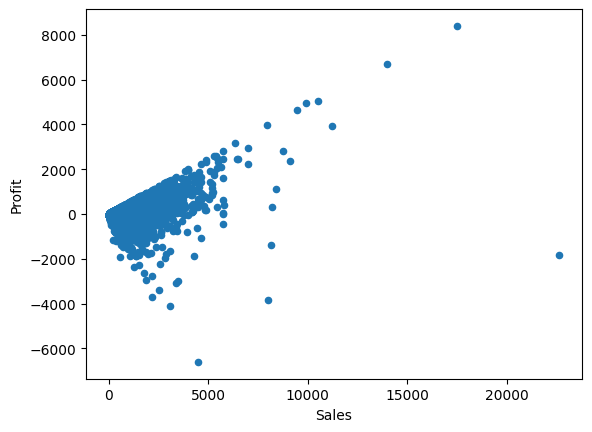

In [ ]:
df.plot(kind='scatter',x='Sales',y='Profit')

**Scatter Plot-Relationship betweeen Quantity and Sales**

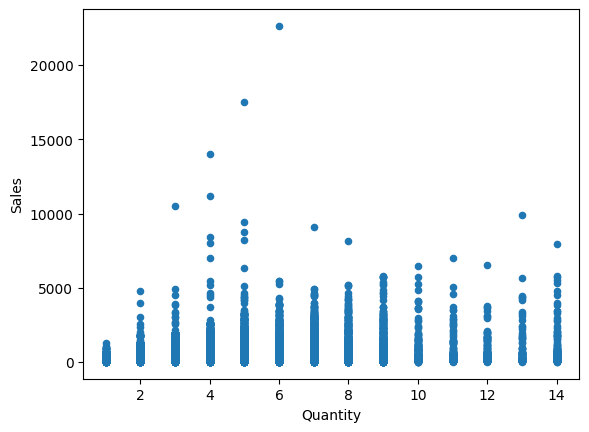

In [ ]:
df.plot(kind='scatter',x='Quantity',y='Sales');

In [ ]:
my_tab5 = pd.crosstab(index=df['Country'],columns=[df['Segment'],df['Category']],values=df['Sales'],aggfunc='mean',margins=True)
my_tab5

Segment        Consumer                                Corporate  \
Category      Furniture Office Supplies  Technology    Furniture   
Country                                                            
Afghanistan  240.680000      189.823333  289.695000  1084.500000   
Albania      414.030000      137.070000  182.070000   210.960000   
Algeria      340.749474      119.211231  467.452500   382.545000   
Angola       601.123636      117.426111  552.399000   181.722000   
Argentina    266.991522       55.136136  251.569795   247.476188   
...                 ...             ...         ...          ...   
Vietnam      290.877566      120.039788  329.618353   334.276700   
Yemen         31.311000       21.591818  157.303800          NaN   
Zambia       367.532500      126.087273  431.356667   331.470000   
Zimbabwe      31.212000       31.152240   86.319000    73.046250   
All          417.742054      120.891192  460.364190   419.548702   

Segment                                 Home Office                  \
Category    Office Supplies  Technology   Furniture Office Supplies   
Country                                                               
Afghanistan      114.976667  807.135000  990.550000       49.190000   
Albania           33.435000  852.180000         NaN             NaN   
Algeria           67.627317  400.281000  140.480000      118.474000   
Angola            61.463684  127.140000  302.677500       82.792500   
Argentina         77.369194  256.369349  255.666000       50.893029   
...                     ...         ...         ...             ...   
Vietnam          198.719786  301.815000  472.115269      180.453962   
Yemen            120.224571   88.992000         NaN      354.564000   
Zambia           128.046923  551.272500  800.840000      106.355625   
Zimbabwe          27.122500  162.807000  627.228000       23.958000   
All              121.997691  464.697265  406.315015      120.210179   

Segment                         All  
Category     Technology              
Country                              
Afghanistan  230.490000  394.060364  
Albania      553.920000  243.007500  
Algeria      331.485000  184.140765  
Angola       472.866000  209.459016  
Argentina    290.242429  147.466111  
...                 ...         ...  
Vietnam      534.153900  248.302639  
Yemen               NaN   82.190400  
Zambia       368.530000  255.250000  
Zimbabwe      89.721000   47.063812  
All          494.898862  246.490581  

[148 rows x 10 columns]

**Top 10 Average Sales by Segment and Category (Country-wise)**

<ipython-input-37-5189aaa275a2>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  top10_avg_sales_segment_and_Category_wise_by_countries=top10_avg_sales_segment_and_Category_wise_by_countries.drop(columns='All')


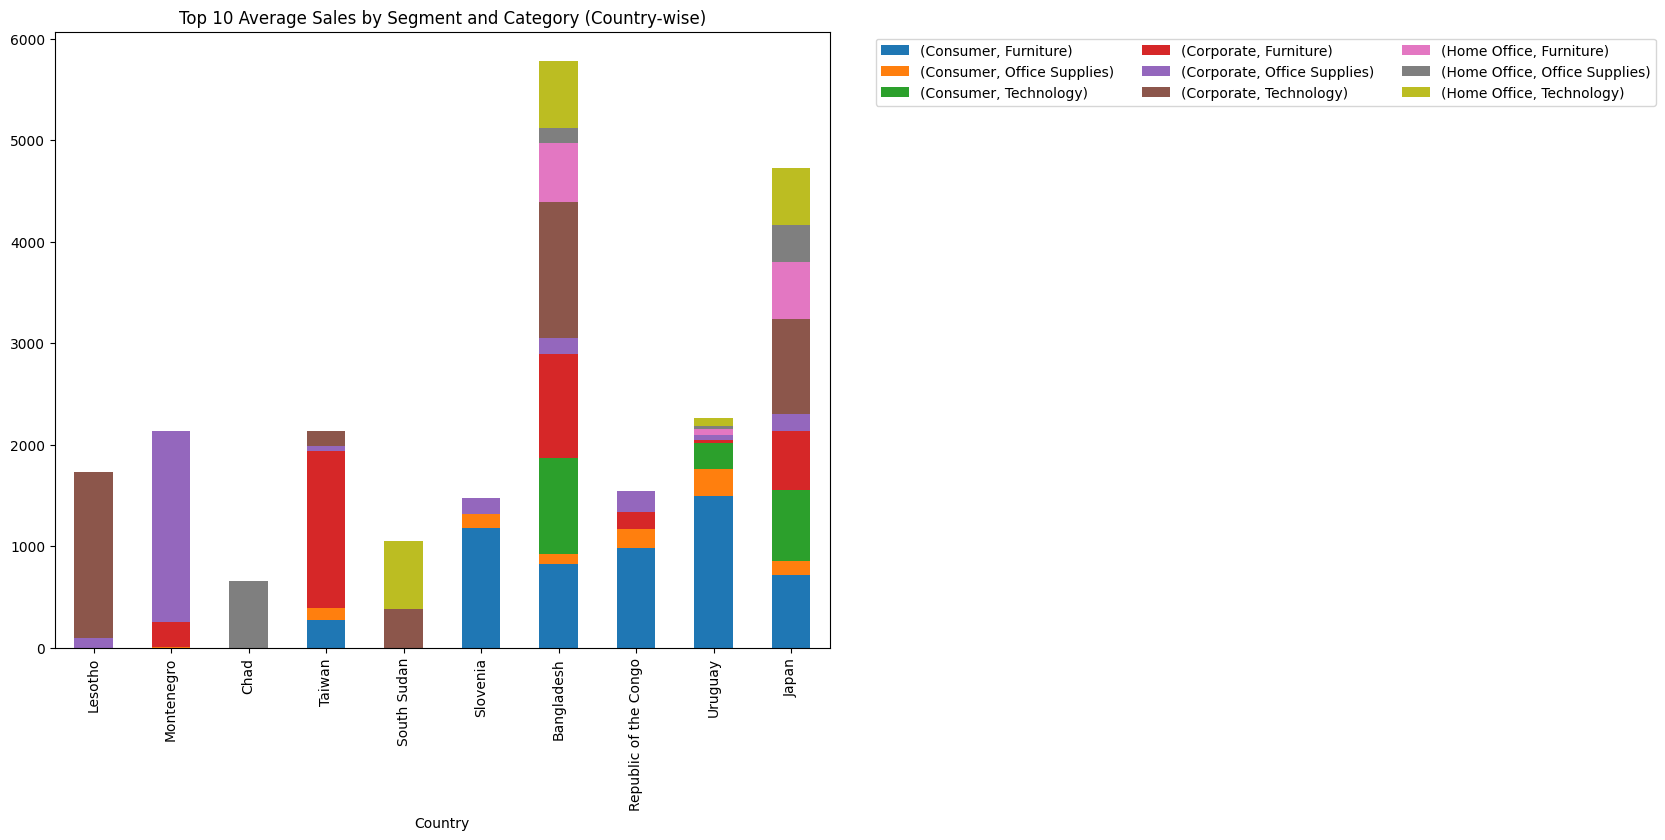

In [ ]:
top10_avg_sales_segment_and_Category_wise_by_countries = my_tab5.sort_values('All',ascending=False)[0:10]
top10_avg_sales_segment_and_Category_wise_by_countries=top10_avg_sales_segment_and_Category_wise_by_countries.drop(columns='All')
top10_avg_sales_segment_and_Category_wise_by_countries.plot(kind='bar',stacked=True,figsize=(10,8));
plt.title("Top 10 Average Sales by Segment and Category (Country-wise)");
plt.legend(ncol=3,bbox_to_anchor=(1.05,1));

In [ ]:
px.treemap(data_frame=df,path=['Category','Sub-Category'],values='Sales')

In [ ]:
px.treemap(data_frame=df, path=['Country','State'],values='Sales')

In [ ]:
px.treemap(data_frame=df, path=['Country','State'],values='Discount')

In [ ]:
px.treemap(data_frame=df, path=['Country','State'],values='Shipping Cost')

In [ ]:
# df.columns
px.treemap(data_frame=df,path=['Category','Segment'],values='Sales')

In [ ]:
px.treemap(data_frame=df, path=['Country','State','City'],values='Sales')

In [ ]:
px.treemap(data_frame=df, path=['Country'],values='Profit')

In [ ]:
df.columns
px.treemap(data_frame=df, path=['Country','State'],values='Quantity')

In [ ]:
px.treemap(data_frame=df,path=['Country','Order Priority'],values='Sales')

In [ ]:
Numerical_data = df.loc[:,['Sales','Profit','Shipping Cost']]
Numerical_data

Sales    Profit  Shipping Cost
0      408.300  106.1400          35.46
1      120.366   36.0360           9.72
2       66.120   29.6400           8.17
3       44.865  -26.0550           4.82
4      113.670   37.7700           4.70
...        ...       ...            ...
51285   13.904    4.5188           0.89
51286    3.990    0.4200           0.49
51287   26.400   12.3600           0.35
51288    7.120    0.5600           0.20
51289    3.024   -0.6048           0.17

[51290 rows x 3 columns]

In [ ]:
colmean = Numerical_data.sum()/Numerical_data.shape[0]
colmean

Sales            246.490581
Profit            28.610982
Shipping Cost     26.375915
dtype: float64

In [ ]:
centered_data = Numerical_data - colmean
centered_data.describe()

Sales        Profit  Shipping Cost
count  5.129000e+04  5.129000e+04   5.129000e+04
mean   6.312734e-15 -4.504029e-15   1.560451e-15
std    4.875654e+02  1.743410e+02   5.729680e+01
min   -2.460466e+02 -6.628589e+03  -2.637592e+01
25%   -2.157320e+02 -2.861098e+01  -2.376592e+01
50%   -1.614376e+02 -1.937098e+01  -1.858592e+01
75%    4.562619e+00  8.199018e+00  -1.925915e+00
max    2.239199e+04  8.371365e+03   9.071941e+02

In [ ]:
column_wise_std = Numerical_data.std(axis=0)
centered_and_scaled_data = centered_data/column_wise_std
centered_and_scaled_data.describe()

Sales        Profit  Shipping Cost
count  5.129000e+04  5.129000e+04   5.129000e+04
mean   1.357637e-17 -2.438205e-17   2.715273e-17
std    1.000000e+00  1.000000e+00   1.000000e+00
min   -5.046433e-01 -3.802083e+01  -4.603383e-01
25%   -4.424678e-01 -1.641093e-01  -4.147861e-01
50%   -3.311096e-01 -1.111098e-01  -3.243796e-01
75%    9.357963e-03  4.702863e-02  -3.361296e-02
max    4.592613e+01  4.801720e+01   1.583324e+01

**Standardization- Z Score**

In [ ]:
df['Sales'] = pd.to_numeric(df['Sales'])
df['Profit'] = pd.to_numeric(df['Profit'])
df['Shipping Cost'] = pd.to_numeric(df['Shipping Cost'])
# df_scaled = preprocessing.scale(df.iloc[:,18])
# df_scaled = preprocessing.scale(df.iloc[21])\
# df_scaled = preprocessing.scale(df.iloc])
# df.iloc[:,17] Sales
# df.iloc[:,21] Profit
# df.iloc[:,22] Shipping Cost

In [ ]:
#Correlation Analysis
correlation = df.iloc[:,17:21].corr()
correlation

Sales  Quantity  Discount    Profit
Sales     1.000000  0.313577 -0.086722  0.484918
Quantity  0.313577  1.000000 -0.019875  0.104365
Discount -0.086722 -0.019875  1.000000 -0.316490
Profit    0.484918  0.104365 -0.316490  1.000000

In [ ]:
my_tab2 = pd.crosstab(index=df['Segment'],columns=df['Category'],margins=True)
my_tab2

Category     Furniture  Office Supplies  Technology    All
Segment                                                   
Consumer          5095            16151        5272  26518
Corporate         3014             9364        3051  15429
Home Office       1767             5758        1818   9343
All               9876            31273       10141  51290

**Most Sales by category (segment-wise)**

Text(0.5, 1.0, 'Most Sales by category (segment-wise)')

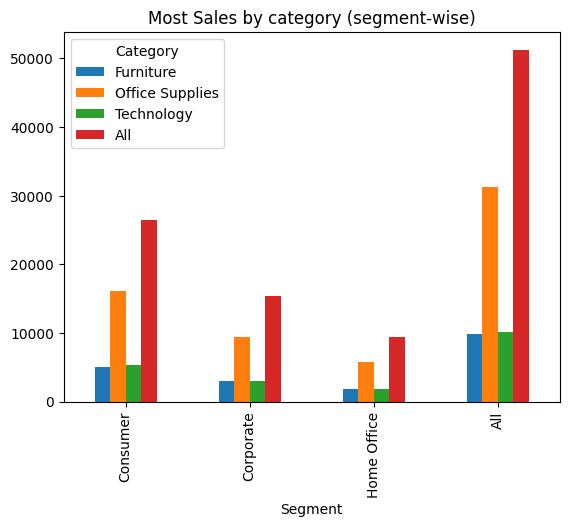

In [ ]:
my_tab2.plot(kind='bar',stacked=False);
plt.title('Most Sales by category (segment-wise)')

In [ ]:
my_tab = pd.crosstab(index = df['Category'],columns='count')
my_tab
propotion_percentage  = (my_tab/my_tab.sum())*100
propotion_percentage

col_0                count
Category                  
Furniture        19.255215
Office Supplies  60.972899
Technology       19.771885

**Proportions of Categories**

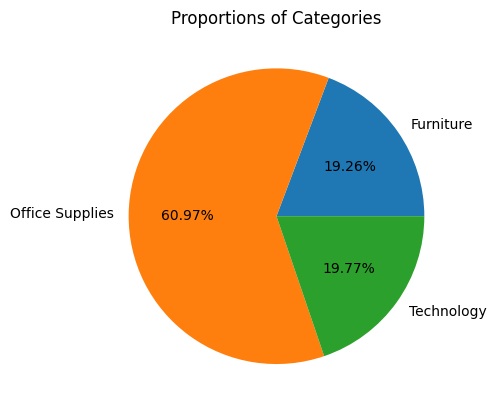

In [ ]:
pie_chart = plt.pie(propotion_percentage['count'],labels = propotion_percentage.index,autopct='%1.2f%%')
plt.title('Proportions of Categories')
plt.show()

**Sales Data Distribution using Density Plot**

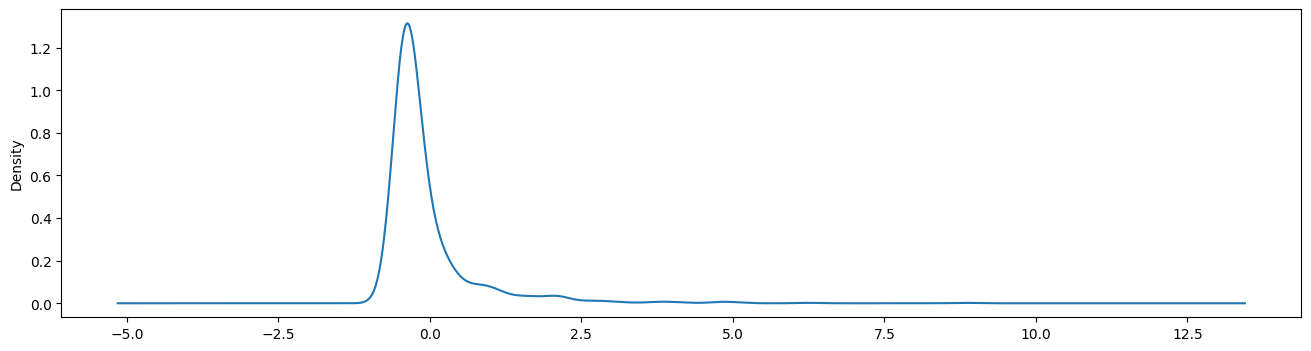

In [ ]:
col_18_scaled = preprocessing.scale(df.iloc[:, 17])
col_21_scaled = preprocessing.scale(df.iloc[:, 20])
col_22_scaled = preprocessing.scale(df.iloc[:, 21])
df['Sales'] = col_18_scaled
df['Profit'] =col_21_scaled
df['Shipping Cost'] = col_22_scaled
df['Sales'].describe()
df['Profit'].describe()
df['Shipping Cost'].describe()
len(df['Sales'])
sample = df['Sales'].sample(n=1000, random_state=42)
sample.plot(kind='density',figsize=(16,4));

**Positively Skewed Distribution**--
**Mean>Median** --

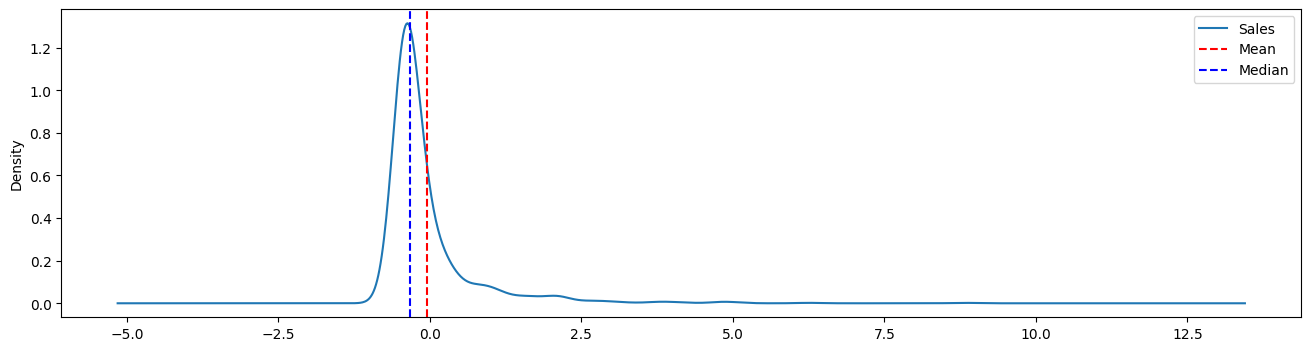

In [ ]:
sample.plot(kind='density',figsize=(16,4));
plt.axvline(x=sample.mean(), color='red', linestyle='--', label='Mean');
plt.axvline(x=sample.median(), color='blue', linestyle='--', label='Median');
plt.legend();

**Median Absolute Distribution**

In [ ]:
#Checking median absolute distribution
mad = np.abs(df['Sales'].median() - df['Sales'])
mad

0        0.662988
1        0.072428
2        0.038832
3        0.082427
4        0.058694
           ...   
51285    0.145929
51286    0.166262
51287    0.120299
51288    0.159843
51289    0.168244
Name: Sales, Length: 51290, dtype: float64

**Skewness Of Sales Data**

In [ ]:
#Checking skewness of the data
sample.skew()

4.332795998560771

**Kurtosis of the Sales Data**

In [ ]:
#Checking kurtosis of the data
sample.kurtosis()

27.40588140330035

In [ ]:
sample.describe()

count    1000.000000
mean       -0.053698
std         0.803042
min        -0.502605
25%        -0.441010
50%        -0.331484
75%        -0.044493
max         8.797851
Name: Sales, dtype: float64

**Boxplot grouped by Segment Sales wise**

In [ ]:
px.box(x='Segment',y='Sales',data_frame=df)

**Boxplot grouped by Category Sales wise**

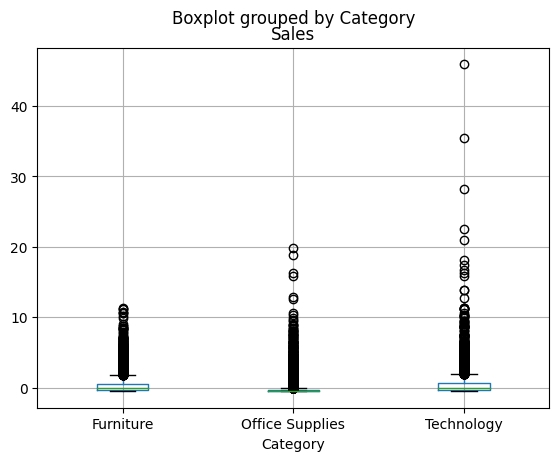

In [ ]:
df.boxplot(column='Sales',by='Category');

In [ ]:
my_tab5 = pd.crosstab(index=df['Country'],columns=[df['Category']],margins=True)
my_tab5.columns= ['Furniture',	'Office Supplies',	'Technology','rowtotal']
lis = []
for i in my_tab5.index:
  lis.append(str(i))
lis[-1] = 'Coltotal'
lis
my_tab5.index = lis
top_countries_segment_wise_sales = my_tab5.sort_values('rowtotal',ascending=False)
top_countries_segment_wise_sales= top_countries_segment_wise_sales[1:11]
top_countries_segment_wise_sales

Furniture  Office Supplies  Technology  rowtotal
United States        2121             6026        1847      9994
Australia             596             1608         633      2837
France                420             1854         553      2827
Mexico                641             1492         511      2644
Germany               318             1348         399      2065
China                 422             1065         393      1880
United Kingdom        224             1091         318      1633
Brazil                381              891         327      1599
India                 360              841         354      1555
Indonesia             279              831         280      1390

**Top 10 Countries Segment wise Sales**

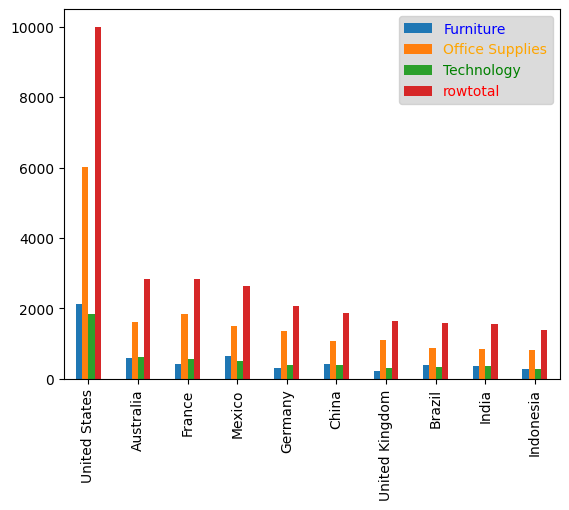

In [ ]:
top_countries_segment_wise_sales.plot(kind='bar',stacked=False);
plt.legend(labelcolor=['blue','orange','green','red'],facecolor='lightgrey');
plt.title('');

**Top 10 Countries Most Sales Category & Sub-Category Wise**

In [ ]:
my_tab3 = pd.crosstab(index=df['Country'],columns=[df['Category'],df['Sub-Category']],margins=True)
top10_countries_no_sales_subcategory_wise = my_tab3.sort_values('All',ascending=False)[1:11]
top10_countries_no_sales_subcategory_wise

Category       Furniture                           Office Supplies       \
Sub-Category   Bookcases Chairs Furnishings Tables      Appliances  Art   
Country                                                                   
United States        228    617         957    319             466  796   
Australia            157    251         150     38              91  171   
France               132    152         109     27              99  398   
Mexico               160    260         172     49              78  174   
Germany               97     98         101     22              56  314   
China                116    168         105     33              55  119   
United Kingdom        84     57          67     16              42  229   
Brazil               107    140         102     32              50   93   
India                 98    139          99     24              42   76   
Indonesia             70     98          77     34              54   99   

Category                                                                  \
Sub-Category   Binders Envelopes Fasteners Labels Paper Storage Supplies   
Country                                                                    
United States     1523       254       217    364  1370     846      190   
Australia          247       150       172    199   190     197      191   
France             397       120       113    139   119     340      129   
Mexico             270       169       147    159   141     202      152   
Germany            255        88        91     97    76     278       93   
China              163       112       105    122   123     144      122   
United Kingdom     218        89        80     70    72     227       64   
Brazil             134       110       106     93    97     111       97   
India              146        91        93     94   105     108       86   
Indonesia          121        86        94     94    76     118       89   

Category        Technology                           All  
Sub-Category   Accessories Copiers Machines Phones        
Country                                                   
United States          775      68      115    889  9994  
Australia              195     179       85    174  2837  
France                 129     132      137    155  2827  
Mexico                 156     165       36    154  2644  
Germany                104      90       78    127  2065  
China                  111     121       65     96  1880  
United Kingdom          70      76       79     93  1633  
Brazil                  90     111       25    101  1599  
India                  102      84       49    119  1555  
Indonesia               75      81       48     76  1390

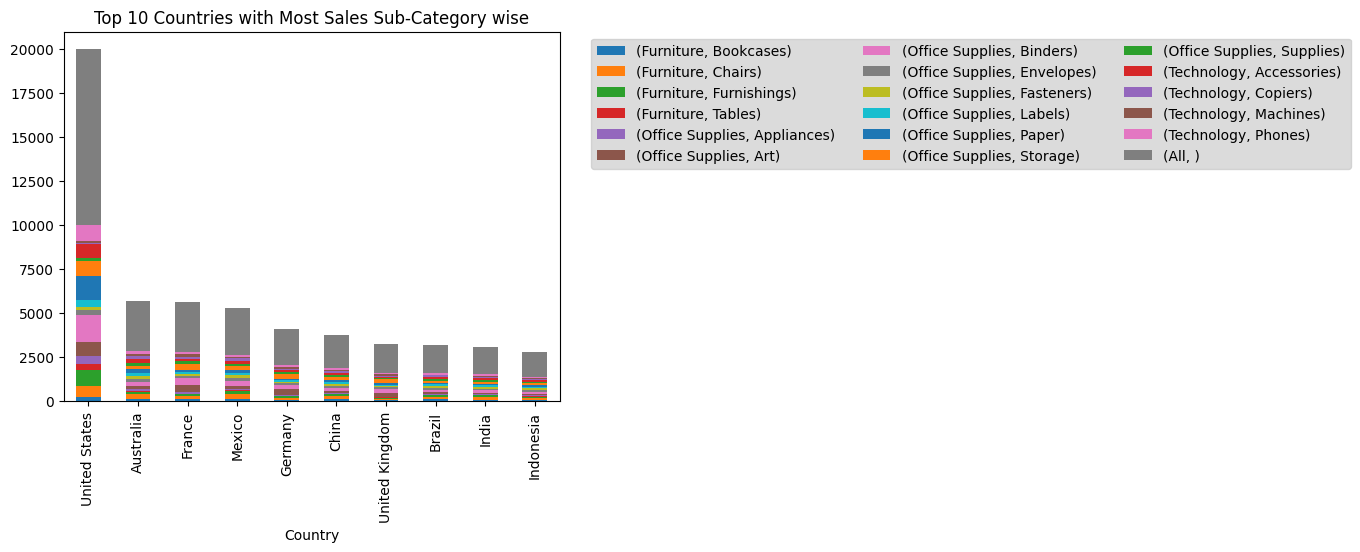

In [ ]:
top10_countries_no_sales_subcategory_wise.plot(kind='bar',stacked=True);
plt.title('Top 10 Countries with Most Sales Sub-Category wise');
plt.legend(bbox_to_anchor=(1.05,1),ncol=3,facecolor='lightgrey');

**Top 10 Countries Most Sales Segment wise**

In [ ]:
my_tab4 = pd.crosstab(index=df['Country'],columns=[df['Segment']],margins=True)
my_tab4.columns = ['Consumer','Corporate','Home Office','rowtotal']
lis2 = []
for i in my_tab4.index:
  lis2.append(str(i))
lis2[-1] = 'Coltotal'
my_tab4.index = lis2
top10_countries_no_sales_segment_wise =  my_tab4.sort_values('rowtotal',ascending=False)[1:11]
top10_countries_no_sales_segment_wise

Consumer  Corporate  Home Office  rowtotal
United States       5191       3020         1783      9994
Australia           1513        847          477      2837
France              1455        884          488      2827
Mexico              1378        816          450      2644
Germany             1104        603          358      2065
China                927        586          367      1880
United Kingdom       816        515          302      1633
Brazil               839        459          301      1599
India                816        430          309      1555
Indonesia            715        448          227      1390

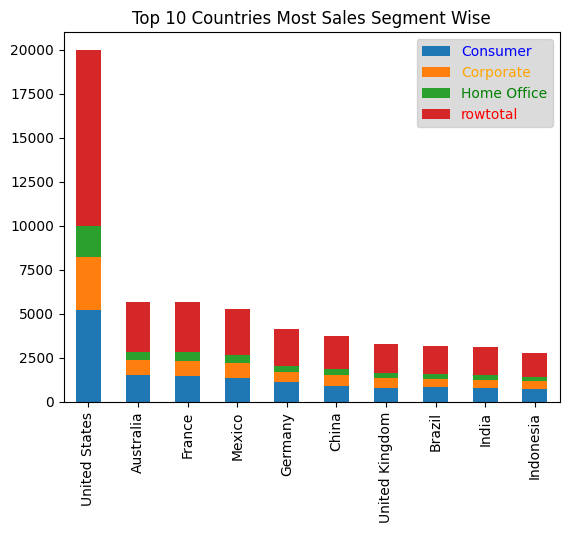

In [ ]:
top10_countries_no_sales_segment_wise.plot(kind='bar',stacked=True);
plt.title('Top 10 Countries Most Sales Segment Wise');
plt.legend(labelcolor=['blue','orange','green','red'],facecolor='lightgrey');

**Top 10 Most Sales by Category and Segment (Countries wise)**

In [ ]:
my_tab5 = pd.crosstab(index=df['Country'],columns=[df['Segment'],df['Category']],margins=True)
my_tab5 = my_tab5.drop(labels='All')
top10_countries_no_sales_category_and_segment_wise = my_tab5.sort_values('All',ascending=False)[:10]
top10_countries_no_sales_category_and_segment_wise

Segment         Consumer                            Corporate                  \
Category       Furniture Office Supplies Technology Furniture Office Supplies   
Country                                                                         
United States       1113            3127        951       646            1820   
Australia            315             859        339       174             483   
France               231             948        276       132             580   
Mexico               334             772        272       212             463   
Germany              162             727        215        92             397   
China                194             540        193       139             326   
United Kingdom       110             557        149        76             334   
Brazil               210             447        182       103             269   
India                186             453        177       103             235   
Indonesia            139             428        148        98             261   

Segment                   Home Office                              All  
Category       Technology   Furniture Office Supplies Technology        
Country                                                                 
United States         554         362            1079        342  9994  
Australia             190         107             266        104  2837  
France                172          57             326        105  2827  
Mexico                141          95             257         98  2644  
Germany               114          64             224         70  2065  
China                 121          89             199         79  1880  
United Kingdom        105          38             200         64  1633  
Brazil                 87          68             175         58  1599  
India                  92          71             153         85  1555  
Indonesia              89          42             142         43  1390

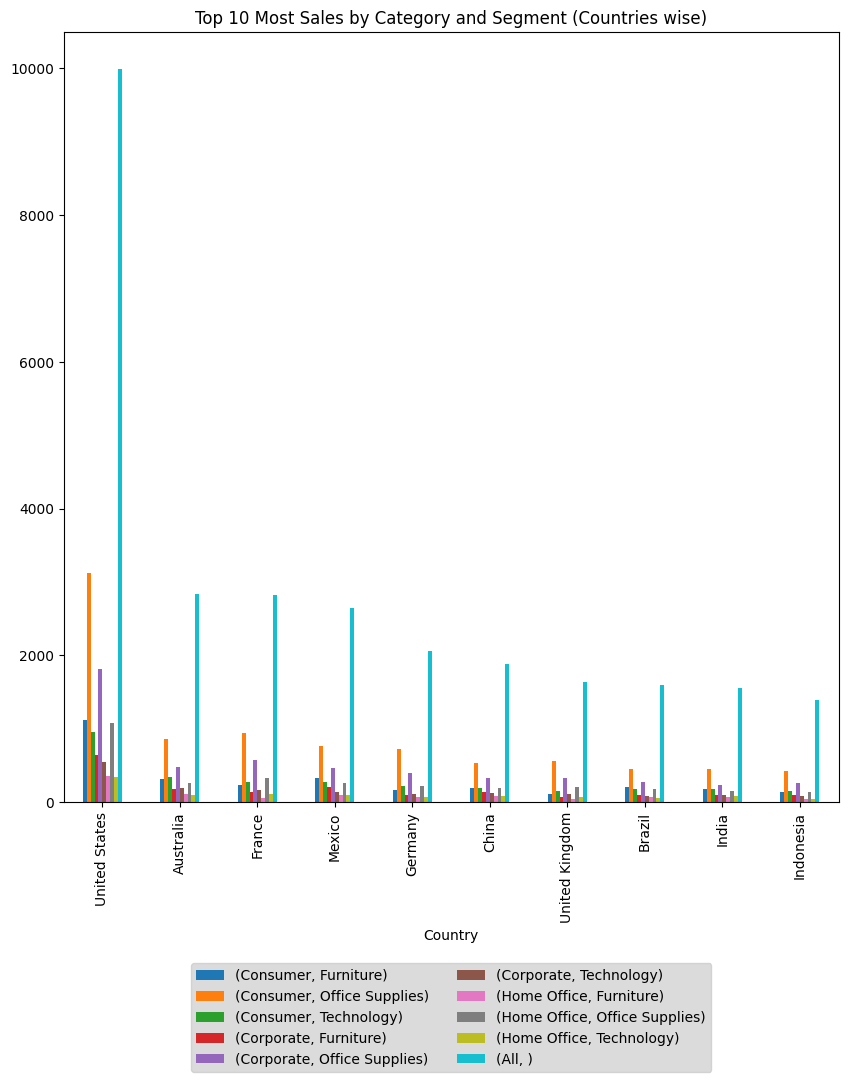

In [ ]:
top10_countries_no_sales_category_and_segment_wise.plot(kind='bar',stacked=False,figsize=(10,10));
plt.legend(ncol=2,bbox_to_anchor=(0.5,-0.2),loc='upper center',facecolor='lightgrey');
plt.title('Top 10 Most Sales by Category and Segment (Countries wise)');

**Sales Distribution Segment Wise**

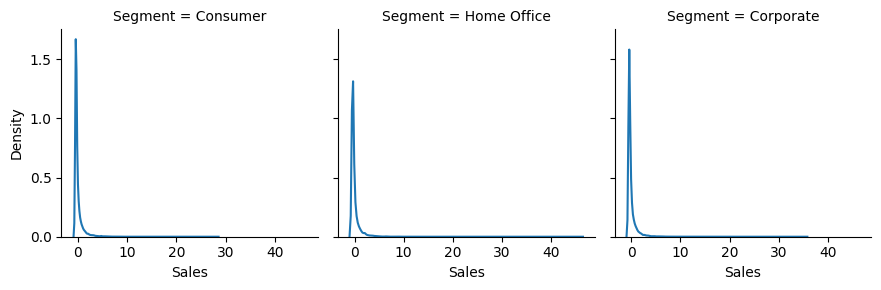

In [ ]:
sales_distribution_segment_wise = sns.FacetGrid(df, col='Segment', margin_titles=True)
sales_distribution_segment_wise.map(sns.kdeplot, 'Sales')
plt.show()

**Top 10 State and Countries with most Sales**

In [ ]:
my_tab6 = pd.crosstab(index=[df['Country'],df['State']],columns=df['Category'],margins=True)
top10_no_sales_countries_and_State_Category_wise = my_tab6.drop(labels='All')
top10_no_sales_countries_and_State_Category_wise = my_tab6.sort_values(by='All',ascending=False)[1:10+1]
top10_no_sales_countries_and_State_Category_wise

<ipython-input-74-12931364b2e2>:2: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Category                               Furniture  Office Supplies  Technology  \
Country        State                                                            
United States  California                    444             1198         359   
United Kingdom England                       204             1005         290   
United States  New York                      236              684         208   
               Texas                         202              604         179   
France         Ile-de-France                 137              636         208   
Australia      New South Wales               172              433         176   
Germany        North Rhine-Westphalia        105              481         133   
Australia      Queensland                    148              399         170   
El Salvador    San Salvador                  147              351         117   
United States  Pennsylvania                  125              343         119   

Category                                All  
Country        State                         
United States  California              2001  
United Kingdom England                 1499  
United States  New York                1128  
               Texas                    985  
France         Ile-de-France            981  
Australia      New South Wales          781  
Germany        North Rhine-Westphalia   719  
Australia      Queensland               717  
El Salvador    San Salvador             615  
United States  Pennsylvania             587

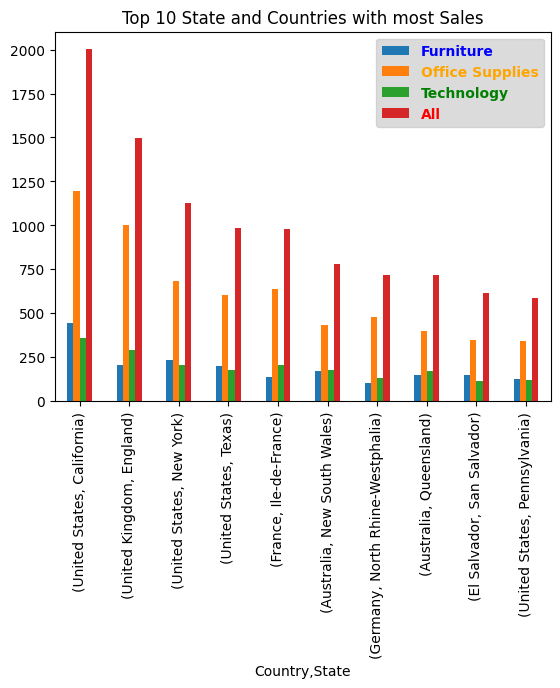

In [ ]:
top10_no_sales_countries_and_State_Category_wise.plot(kind='bar',stacked=False);
plt.title('Top 10 State and Countries with most Sales');
plt.legend(prop={'weight':'bold'},labelcolor=['blue','orange','green','red'],facecolor='lightgray');

**Shipping Cost Data Distribution**

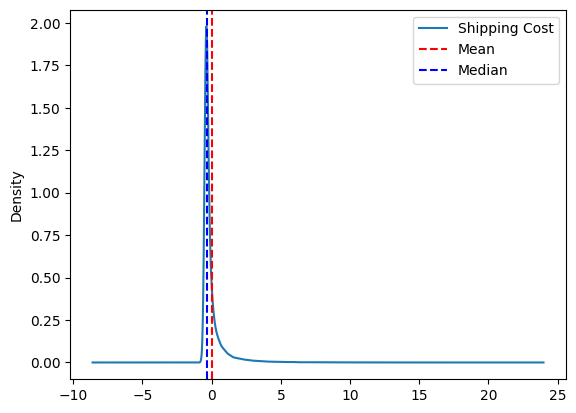

In [ ]:
sample.profit = df['Shipping Cost'].sample(n=100,random_state=42)
df['Shipping Cost'].plot(kind='density')
plt.axvline(x=df['Shipping Cost'].mean(),color='red',linestyle='--',label='Mean')
plt.axvline(x=df['Shipping Cost'].median(),color='blue',linestyle='--',label='Median')
plt.legend();

**Sales Data Distribution after Square-root  **

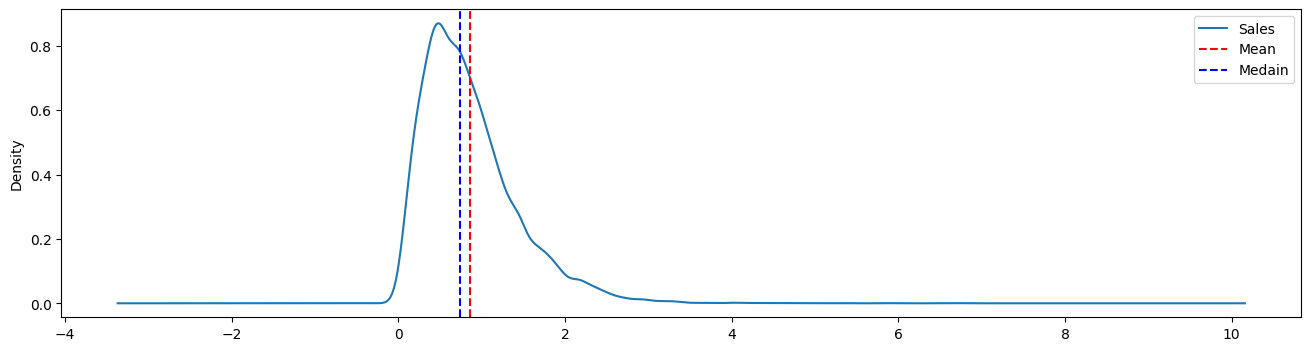

In [ ]:
new_sales = df['Sales'].apply(np.sqrt)
new_sales.plot(kind='density',figsize=(16,4))
plt.axvline(new_sales.mean(),color='red',linestyle='--',label='Mean')
plt.axvline(new_sales.median(),color='blue',linestyle='--',label='Medain')
plt.legend();

**Feature Selection**

In [ ]:
#"Order Date," "Ship Mode," , "Segment," "Category," "Sub-Category," "Discount," and "Profit"
reference_date = df['Order Date'].min()
df['Order Date Numeric'] = (df['Order Date'] - reference_date).dt.days
mean_date = df['Order Date Numeric'].mean()
std_date = df['Order Date Numeric'].std()
df['Order Date Z-Score'] = (df['Order Date Numeric'] - mean_date) / std_date

**Encodind Categorical Variables**

In [ ]:
# Encoding categorical variables
lb = LabelEncoder()
df['Ship Mode'] = lb.fit_transform(df['Ship Mode'])
df['Segment'] = lb.fit_transform(df['Segment'])
df['Category'] = lb.fit_transform(df['Category'])
df['Sub-Category'] = lb.fit_transform(df['Sub-Category'])

**Buliding Multiple Linear Regression Model**

In [ ]:
mse_list = []
columns = [['Order Date Z-Score'],['Ship Mode'],['Segment'],['Category'],['Sub-Category'],['Discount'],['Profit'],
           ['Order Date Z-Score','Ship Mode'],['Order Date Z-Score','Segment'],['Order Date Z-Score','Category'],
            ['Order Date Z-Score','Sub-Category'],['Order Date Z-Score','Discount'],['Ship Mode', 'Segment'],
            ['Ship Mode', 'Category'],['Ship Mode', 'Sub-Category'],['Ship Mode', 'Discount'],['Segment', 'Category'],
            ['Segment', 'Sub-Category'],['Segment', 'Discount'],['Category', 'Sub-Category'],['Category', 'Discount'],
            ['Sub-Category', 'Discount'], ['Order Date Z-Score','Ship Mode','Segment','Category','Sub-Category','Discount','Profit']
           ]
for col in columns:
  X = df[col]
  y = df[['Sales']]
  X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=22)
  mlreg = LinearRegression()
  mlreg.fit(X_train,y_train)
  y_pred  = mlreg.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  mse_list.append(mse)

**Mean Squared Error**

In [ ]:
result = pd.DataFrame(list(zip(columns,mse_list))).rename(columns={0:'Combination',1:'MSE'})
result

Combination       MSE
0                                [Order Date Z-Score]  1.157539
1                                         [Ship Mode]  1.157477
2                                           [Segment]  1.157466
3                                          [Category]  1.157741
4                                      [Sub-Category]  1.157219
5                                          [Discount]  1.152407
6                                            [Profit]  0.922121
7                     [Order Date Z-Score, Ship Mode]  1.157542
8                       [Order Date Z-Score, Segment]  1.157531
9                      [Order Date Z-Score, Category]  1.157806
10                 [Order Date Z-Score, Sub-Category]  1.157284
11                     [Order Date Z-Score, Discount]  1.152448
12                               [Ship Mode, Segment]  1.157469
13                              [Ship Mode, Category]  1.157742
14                          [Ship Mode, Sub-Category]  1.157222
15                              [Ship Mode, Discount]  1.152428
16                                [Segment, Category]  1.157733
17                            [Segment, Sub-Category]  1.157213
18                                [Segment, Discount]  1.152401
19                           [Category, Sub-Category]  1.157503
20                               [Category, Discount]  1.152738
21                           [Sub-Category, Discount]  1.152157
22  [Order Date Z-Score, Ship Mode, Segment, Categ...  0.914154

**Best Combination**

In [ ]:
result.loc[result['MSE']<1]

Combination       MSE
6                                            [Profit]  0.922121
22  [Order Date Z-Score, Ship Mode, Segment, Categ...  0.914154

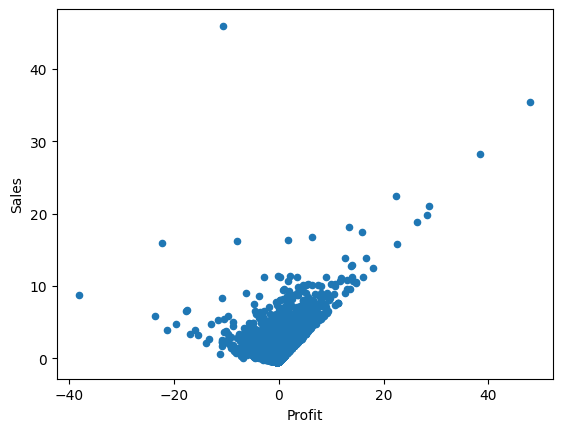

In [ ]:
df.plot(kind='scatter',x='Profit',y='Sales');

In [ ]:
dir(sm)

['BayesGaussMI',
 'BinomialBayesMixedGLM',
 'ConditionalLogit',
 'ConditionalMNLogit',
 'ConditionalPoisson',
 'Factor',
 'GEE',
 'GLM',
 'GLMGam',
 'GLS',
 'GLSAR',
 'GeneralizedPoisson',
 'HurdleCountModel',
 'Logit',
 'MANOVA',
 'MI',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NegativeBinomialP',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'PoissonBayesMixedGLM',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'TruncatedLFNegativeBinomialP',
 'TruncatedLFPoisson',
 'WLS',
 'ZeroInflatedGeneralizedPoisson',
 'ZeroInflatedNegativeBinomialP',
 'ZeroInflatedPoisson',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '__version_info__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'gam',
 'genmod',
 'graphics',
 'iolib',
 'load',
 

Text(0.5, 1.0, 'Sales Standardized Distribution')

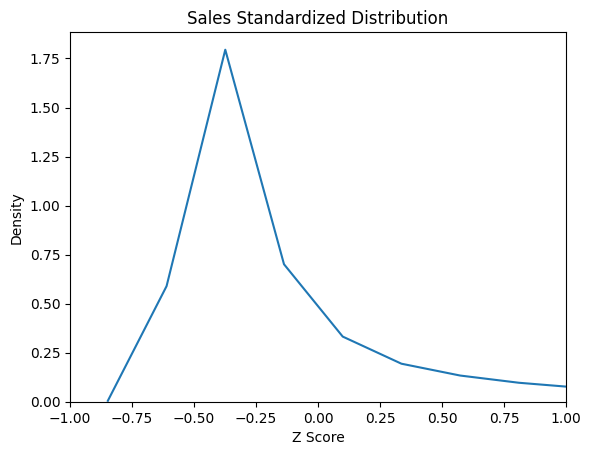

In [ ]:
sns.kdeplot(df['Sales'],common_norm=True)
plt.xlabel('Z Score')
plt.xlim([-1,1])
plt.title('Sales Standardized Distribution')

In [ ]:
px.histogram(data_frame=df,x=df['Sales'])

In [ ]:
df

Row ID         Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       42433     AG-2011-2040 2011-01-01 2011-06-01          3    TB-11280   
1       22253    IN-2011-47883 2011-01-01 2011-08-01          3    JH-15985   
2       48883     HU-2011-1220 2011-01-01 2011-05-01          2      AT-735   
3       11731  IT-2011-3647632 2011-01-01 2011-05-01          2    EM-14140   
4       22255    IN-2011-47883 2011-01-01 2011-08-01          3    JH-15985   
...       ...              ...        ...        ...        ...         ...   
51285   32593   CA-2014-115427 2014-12-31 2015-04-01          3    EB-13975   
51286   47594     MO-2014-2560 2014-12-31 2015-05-01          3     LP-7095   
51287    8857   MX-2014-110527 2014-12-31 2015-02-01          2    CM-12190   
51288    6852   MX-2014-114783 2014-12-31 2015-06-01          3    TD-20995   
51289   36388   CA-2014-156720 2014-12-31 2015-04-01          3    JM-15580   

          Customer Name  Segment         City             State  ...  \
0       Toby Braunhardt        0  Constantine       Constantine  ...   
1           Joseph Holt        0  Wagga Wagga   New South Wales  ...   
2         Annie Thurman        0     Budapest          Budapest  ...   
3          Eugene Moren        2    Stockholm         Stockholm  ...   
4           Joseph Holt        0  Wagga Wagga   New South Wales  ...   
...                 ...      ...          ...               ...  ...   
51285        Erica Bern        1    Fairfield        California  ...   
51286         Liz Preis        0       Agadir  Souss-Massa-Draâ  ...   
51287  Charlotte Melton        0      Managua           Managua  ...   
51288     Tamara Dahlen        0       Juárez         Chihuahua  ...   
51289     Jill Matthias        0     Loveland          Colorado  ...   

      Sub-Category                                     Product Name     Sales  \
0               14                              Tenex Lockers, Blue  0.331875   
1               15                         Acme Trimmer, High Speed -0.258685   
2               14                          Tenex Box, Single Width -0.369945   
3               12                      Enermax Note Cards, Premium -0.413540   
4                9                       Eldon Light Bulb, Duo Pack -0.272419   
...            ...                                              ...       ...   
51285            3  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl -0.477041   
51286            3          Wilson Jones Hole Reinforcements, Clear -0.497375   
51287           10           Hon Color Coded Labels, 5000 Label Set -0.451412   
51288           10           Hon Legal Exhibit Labels, Alphabetical -0.490956   
51289            8                              Bagged Rubber Bands -0.499357   

      Quantity  Discount    Profit Shipping Cost  Order Priority  \
0            2       0.0  0.444702      0.158546          Medium   
1            3       0.1  0.042589     -0.290698          Medium   
2            4       0.0  0.005902     -0.317751            High   
3            3       0.5 -0.313561     -0.376219            High   
4            5       0.1  0.052536     -0.378313          Medium   
...        ...       ...       ...           ...             ...   
51285        2       0.2 -0.138191     -0.444810          Medium   
51286        1       0.0 -0.161702     -0.451791          Medium   
51287        3       0.0 -0.093215     -0.454234          Medium   
51288        1       0.0 -0.160899     -0.456852          Medium   
51289        3       0.2 -0.167580     -0.457376          Medium   

       Order Date Numeric  Order Date Z-Score  
0                       0           -2.052291  
1                       0           -2.052291  
2                       0           -2.052291  
3                       0           -2.052291  
4                       0           -2.052291  
...                   ...                 ...  
51285                1460            1.469838  
51286              

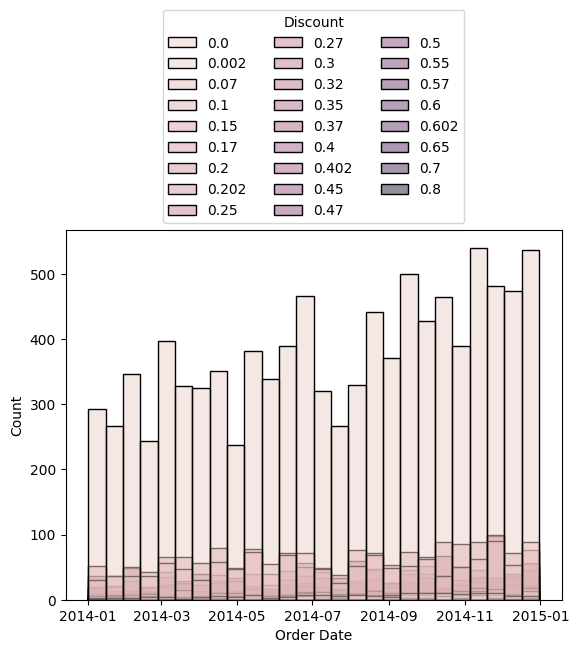

In [ ]:
df['Order Date'].value_counts(ascending=False)
most_ordered_year = df.loc[df['Order Date'].dt.year==2014]['Order Date']
discoun = df.loc[df['Order Date'].dt.year==2014]['Discount']
pl = sns.histplot(x=most_ordered_year,hue=discoun,color='red',legend=True)
sns.move_legend(pl,"lower center",
    bbox_to_anchor=(.5, 1), ncol=3,)

In [ ]:
px.histogram(data_frame=df,x=df['Order Date'],)


1    0.609729
2    0.197719
0    0.192552
Name: Category, dtype: float64